## 概要
このnotebookではbacktraderでリバランスなし(BuyAndHold)の簡単なバックテストを行う例を示します

## 1. 環境準備
ライブラリのインストールなど。

In [38]:
# check python version
!python --version

Python 3.10.14


In [39]:
# install requirement
%pip install backtrader yfinance matplotlib ipympl


[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## 2. ライブラリのインポート
必要なライブラリをインポートします

In [40]:
# import libs
import datetime
import backtrader as bt
import yfinance as yf

## 3. パラメータ設定
必要なパラメータを設定します。（適宜変更がしやすいように設定箇所をコードから独立させてます）

In [41]:
## tickerと割合
TICKERS = {"VTI": 0.4, "BND": 0.4, "GLDM": 0.2}

## 開始日時と終了日時
FROMDATE = datetime.datetime(2023, 7, 1)
TODATE = datetime.datetime(2024, 7, 1)

## 4. Strategyを実装する

In [42]:
# Buy and Hold戦略の定義
class BuyAndHold(bt.Strategy):
    def __init__(self):
        pass

    def next(self):
        if not self.position:
            for data in self.datas:
                allocation= data.target
                cash_for_asset = self.broker.get_cash() * allocation
                self.buy(data=data, size=int(cash_for_asset // data.close[0]))

## 4. バックテストを実行する
データの読みこみを行い、バックテストを実行します。

In [43]:
# backtraderの初期化
cerebro = bt.Cerebro()
cerebro.addstrategy(BuyAndHold)

0

In [44]:
# yahoofinanceからデータを読み込む
for ticker, target in TICKERS.items():
    data = bt.feeds.PandasData(
        dataname=yf.download(ticker, start=FROMDATE, end=TODATE)
    )
    data.target = target
    cerebro.adddata(data, name=ticker)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [45]:
# バックテストの実行
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

cerebro.run()

print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 10000.00
Final Portfolio Value: 11245.16


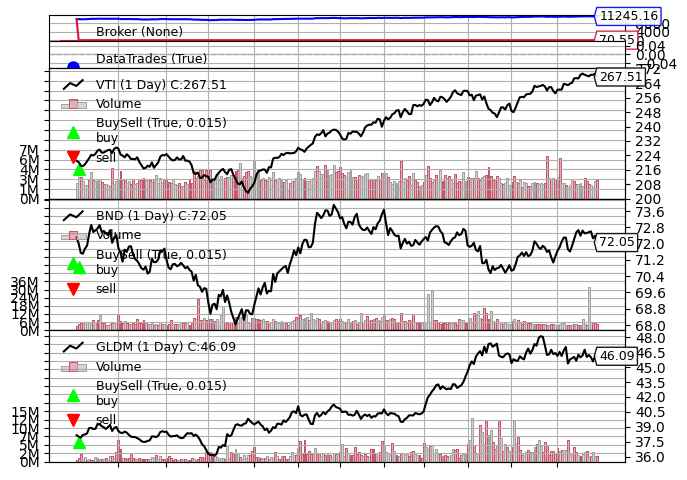

[[<Figure size 640x480 with 8 Axes>]]

In [47]:
%matplotlib inline
cerebro.plot(iplot=False)